## EDA (Exploratory Data Analysis)
### The Doubs dataset have been collected at 30 sites along the Doubs River (near the France–Switzerland border in the Jura Mountains. )
#### DoubsAbu: contains coded abundances of 27 fish species.
#### DoubsEnv: contains 11 environmental variables related to the hydrology, geomorphology and chemistry of the river.
#### DoubsSpa: contains the geographical coordinates (Cartesian, X and Y) of the sites.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_Abu = pd.read_csv('data/DoubsAbu.csv')
print(df_Abu.shape)
df_Abu.head()

(30, 27)


,CHA,TRU,VAI,LOC,OMB,BLA,HOT,TOX,VAN,CHE,...,ROT,CAR,TAN,BCO,PCH,GRE,GAR,BBO,ABL,ANG
0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,5,4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,5,5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,4,5,5,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.0
4,0,2,3,2,0,0,0,0,5,2,...,2,0,3,0,0,0,5,0,0,0.0


In [3]:
df_Env = pd.read_csv('data/DoubsEnv.csv')
print(df_Env.shape)
df_Env.head()

(30, 11)


,das,alt,pen,deb,pH,dur,pho,nit,amm,oxy,dbo
0,0.3,934,48.0,0.84,7.9,45,0.01,0.20,0.00,12.2,2.7
1,2.2,932,3.0,1.00,8.0,40,0.02,0.20,0.10,10.3,1.9
2,10.2,914,3.7,1.80,8.3,52,0.05,0.22,0.05,10.5,3.5
3,18.5,854,3.2,2.53,8.0,72,0.10,0.21,0.00,11.0,1.3
4,21.5,849,2.3,2.64,8.1,84,0.38,0.52,0.20,8.0,6.2


In [4]:
df_Spa = pd.read_csv('data/DoubsSpa.csv')
print(df_Spa.shape)
df_Spa.head()

(30, 2)


,x,y
0,88,7
1,94,14
2,102,18
3,100,28
4,106,39


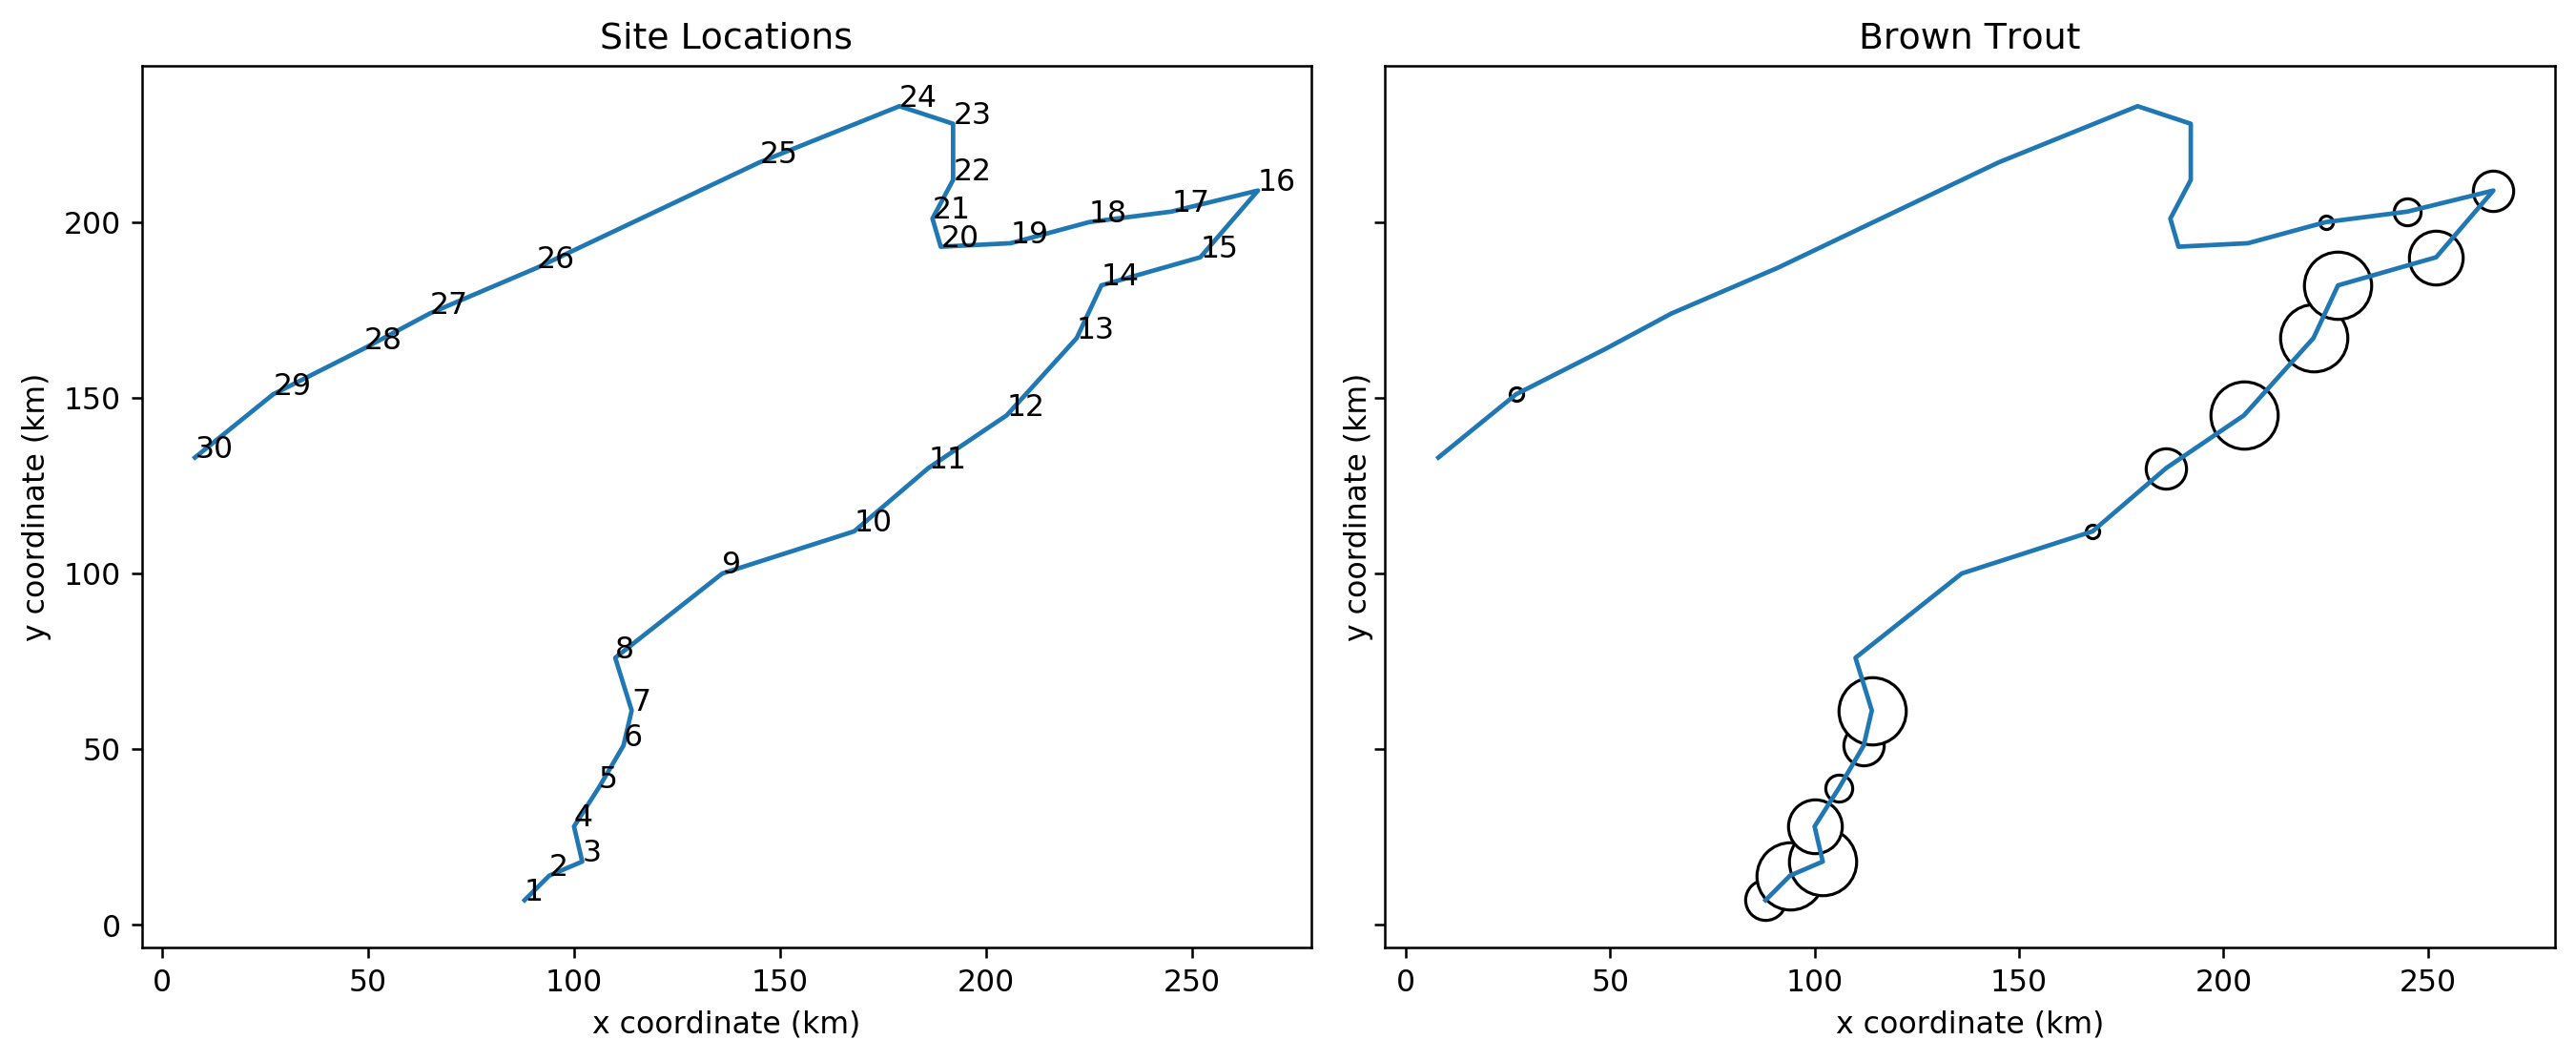

In [5]:
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))
# Site Locations
axes[0].plot(df_Spa['x'], df_Spa['y'])

for i in range(df_Spa.shape[0]):
    axes[0].annotate(str(i+1), (df_Spa['x'][i], df_Spa['y'][i]))

axes[0].set_xlabel('x coordinate (km)')
axes[0].set_ylabel('y coordinate (km)')
axes[0].set_title('Site Locations')

# Brown Trout
axes[1].plot(df_Spa['x'], df_Spa['y'])

for i in range(df_Spa.shape[0]):
    axes[1].scatter(df_Spa['x'][i], df_Spa['y'][i], marker='o', s=np.square(df_Abu.iloc[i]['TRU'])*20, facecolor='w', edgecolor='k')

axes[1].set_xlabel('x coordinate (km)')
axes[1].set_ylabel('y coordinate (km)')
axes[1].set_title('Brown Trout')

plt.tight_layout()

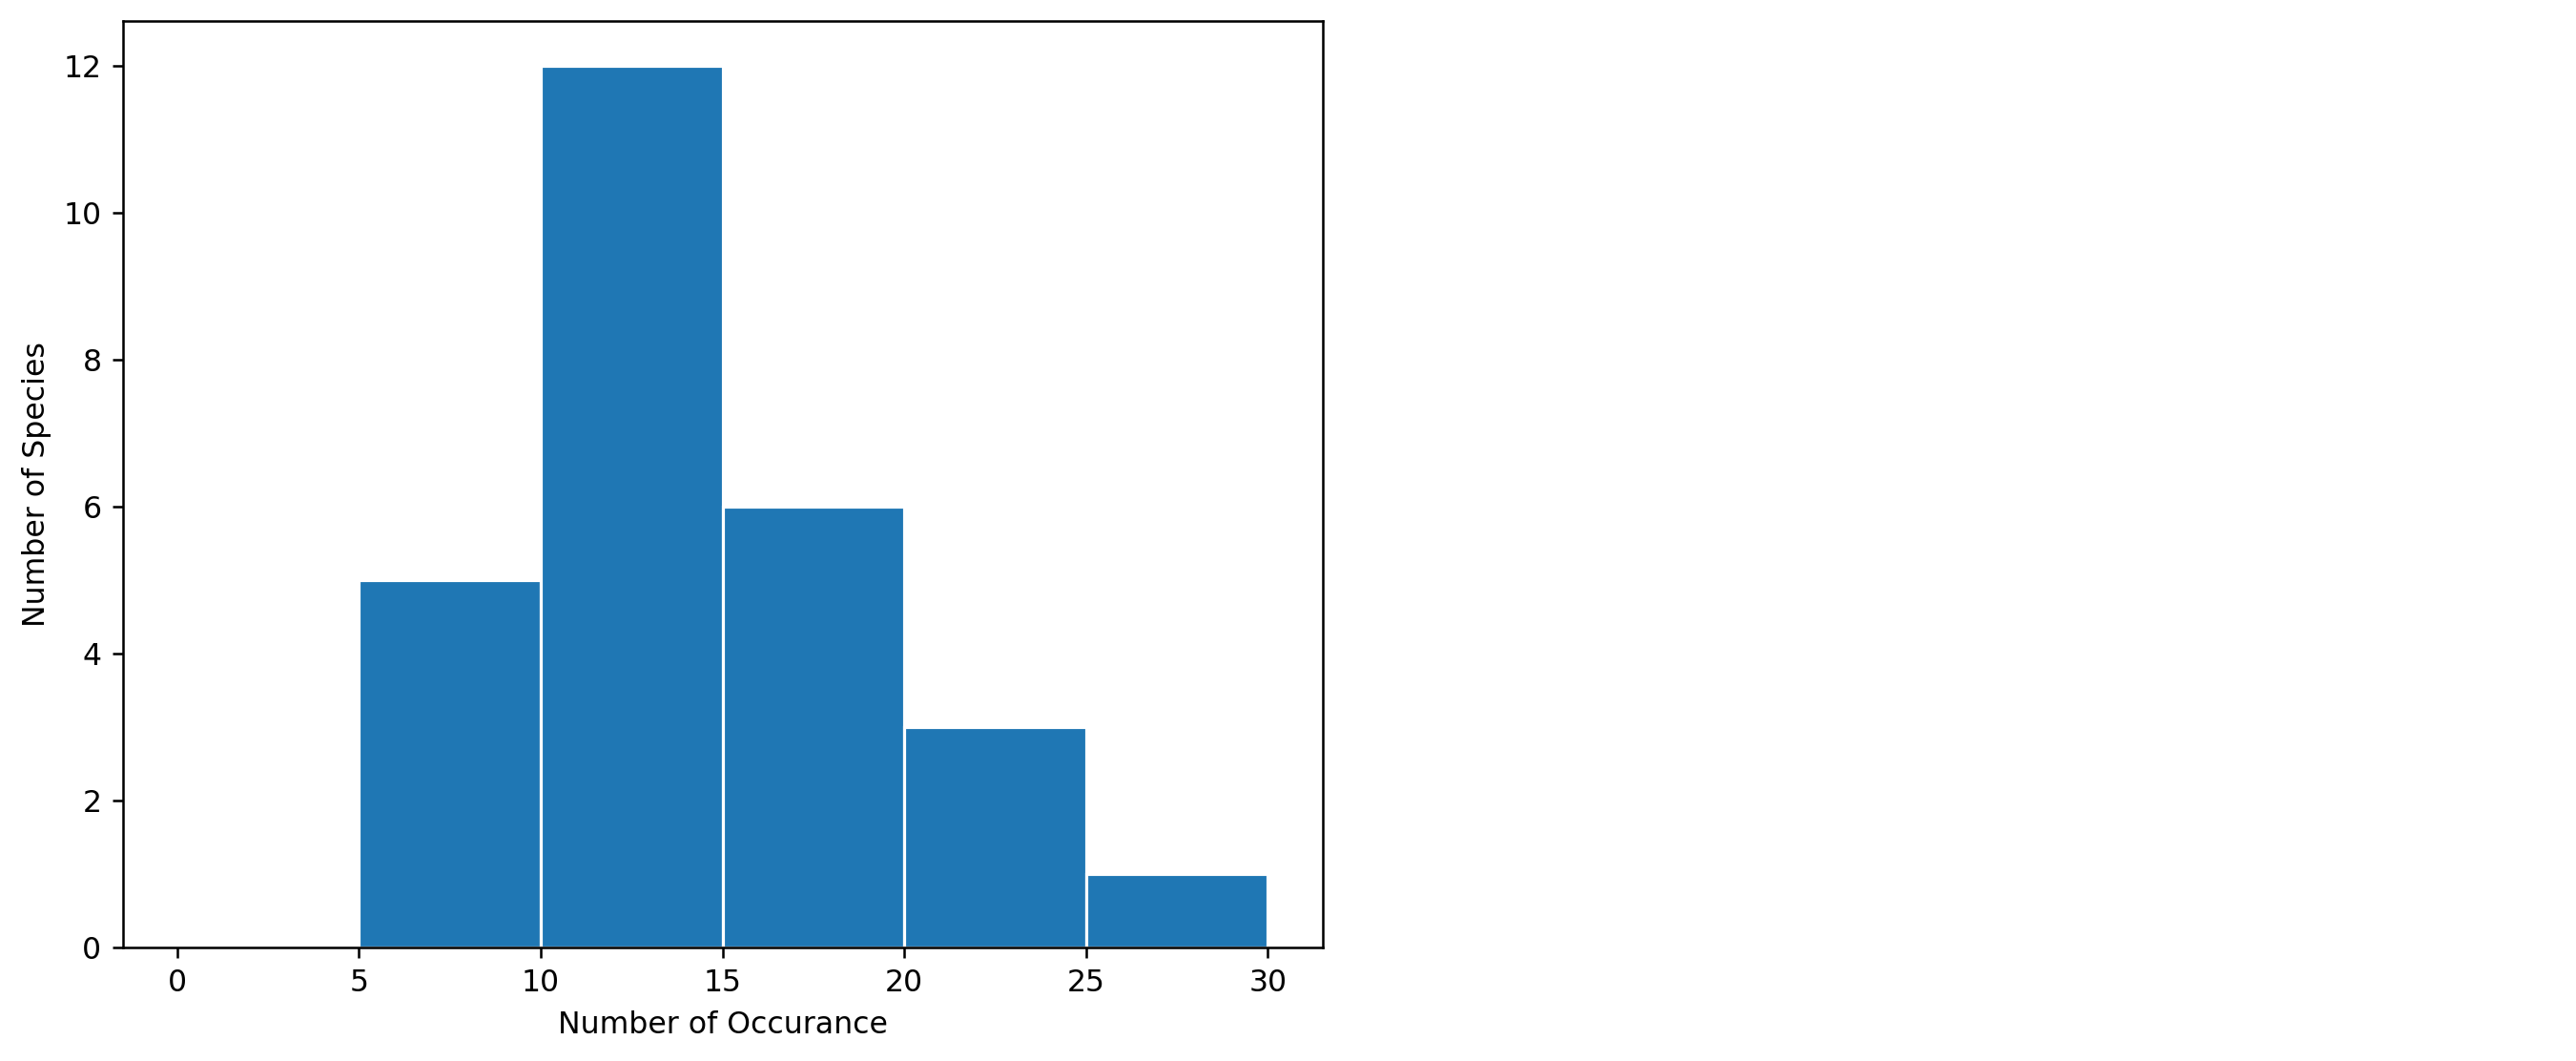

In [6]:
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))
# Compute the number of sites where each species is present
species_occurance = (df_Abu > 0).astype(int).sum(axis=0).sort_values()

species_occurance.plot(kind='hist', bins=np.linspace(0, 30, 7), edgecolor='w', ax=axes[0])
axes[0].set_xlabel('Number of Occurance')
axes[0].set_ylabel('Number of Species')
axes[1].axis('off')
plt.tight_layout()

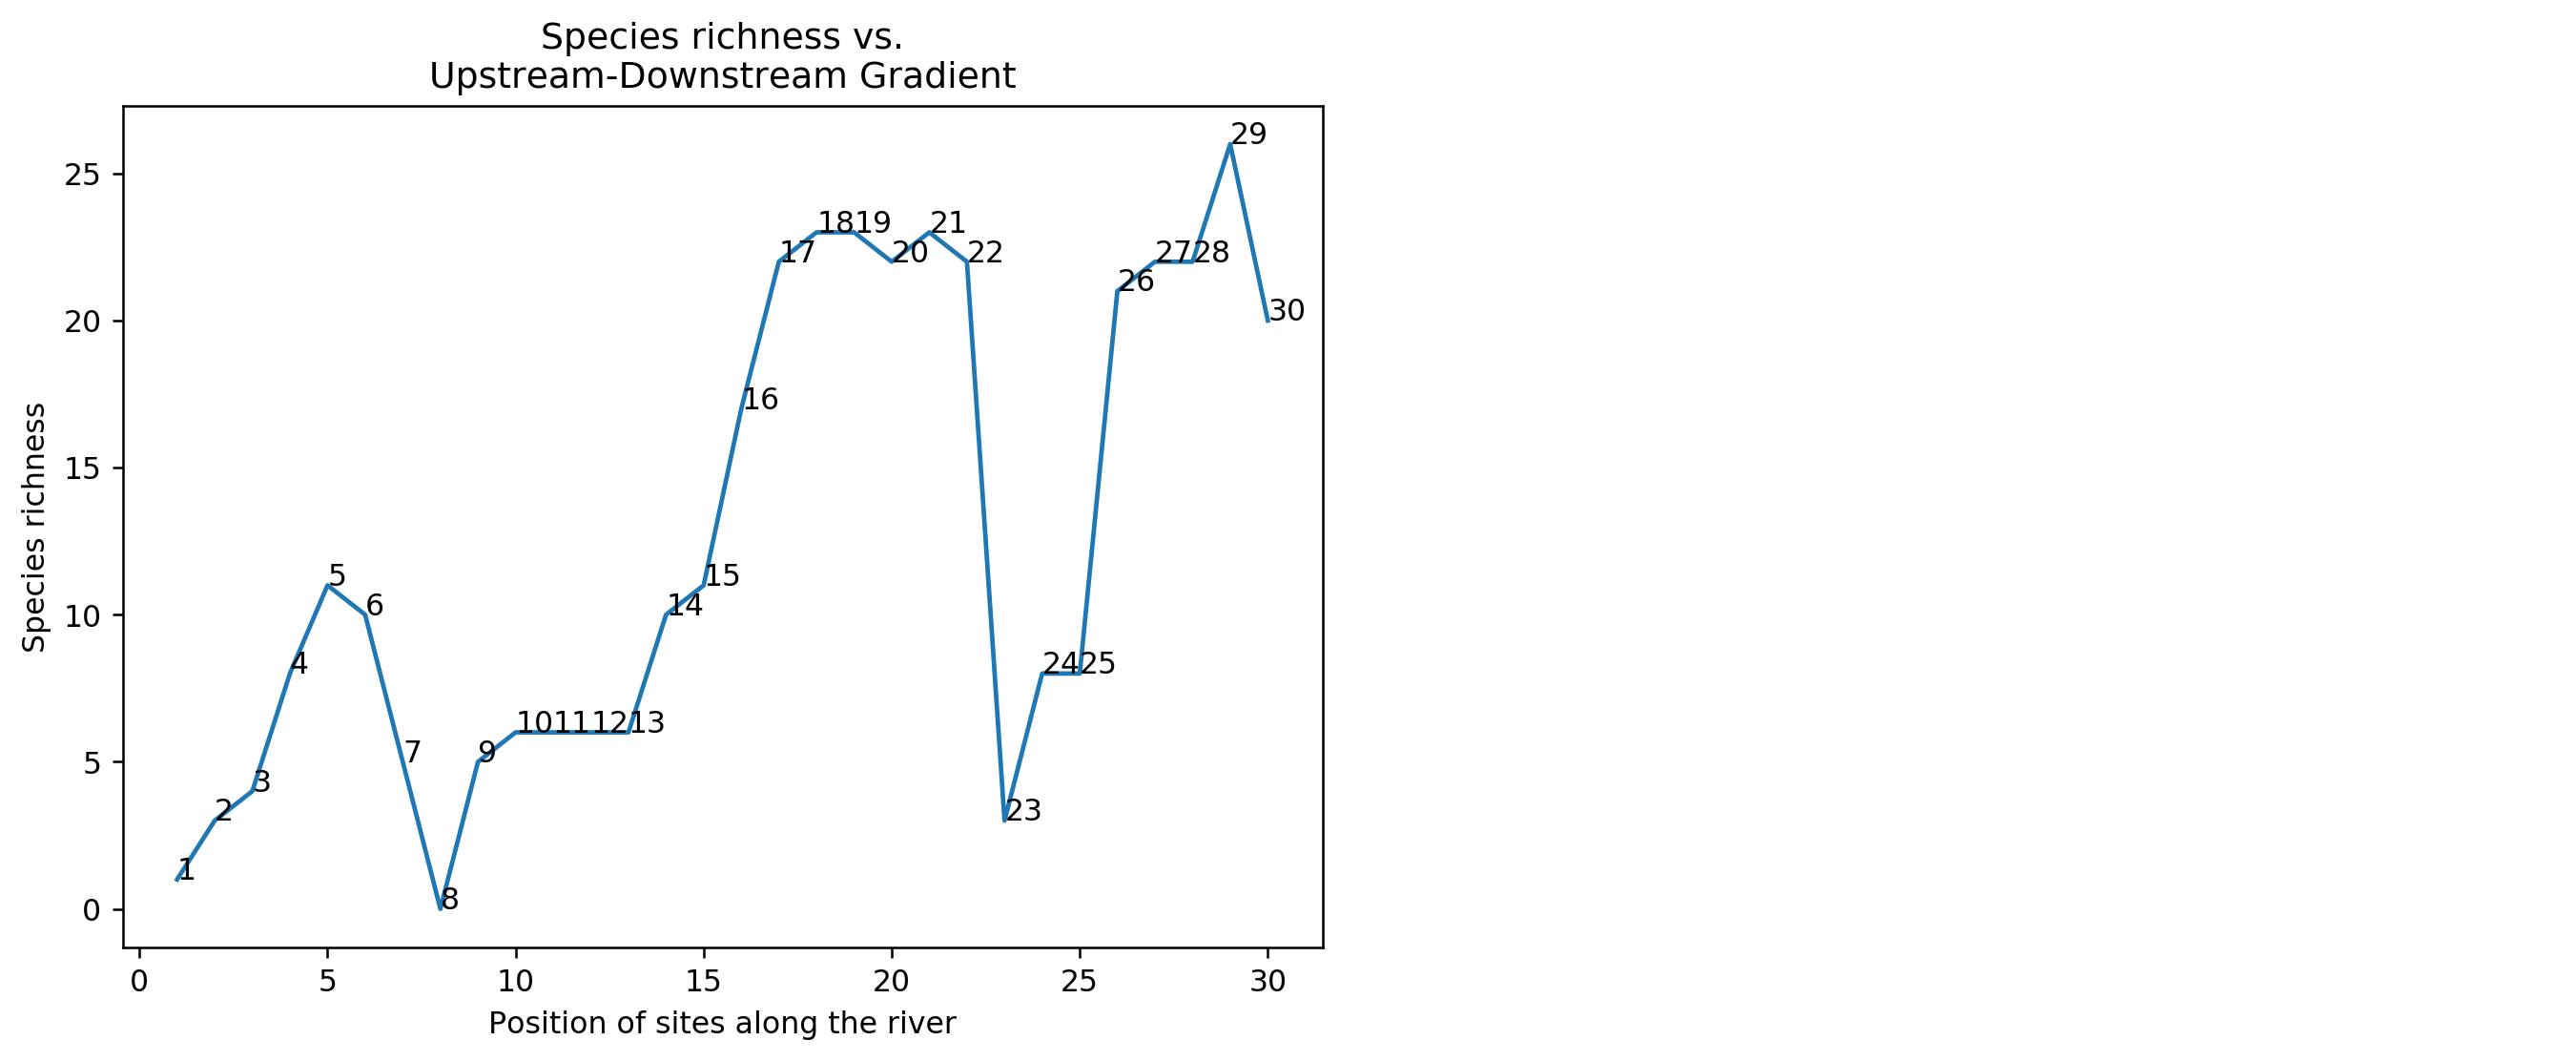

In [7]:
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))

species_richness = (df_Abu > 0).astype(int).sum(axis=1)

axes[0].plot(np.arange(1, df_Abu.shape[0]+1), species_richness)
for i in range(df_Spa.shape[0]):
    axes[0].annotate(str(i+1), (i+1, species_richness[i]))

axes[0].set_xlabel('Position of sites along the river')
axes[0].set_ylabel('Species richness')
axes[0].set_title('Species richness vs.\nUpstream-Downstream Gradient')
axes[1].axis('off')
plt.tight_layout()

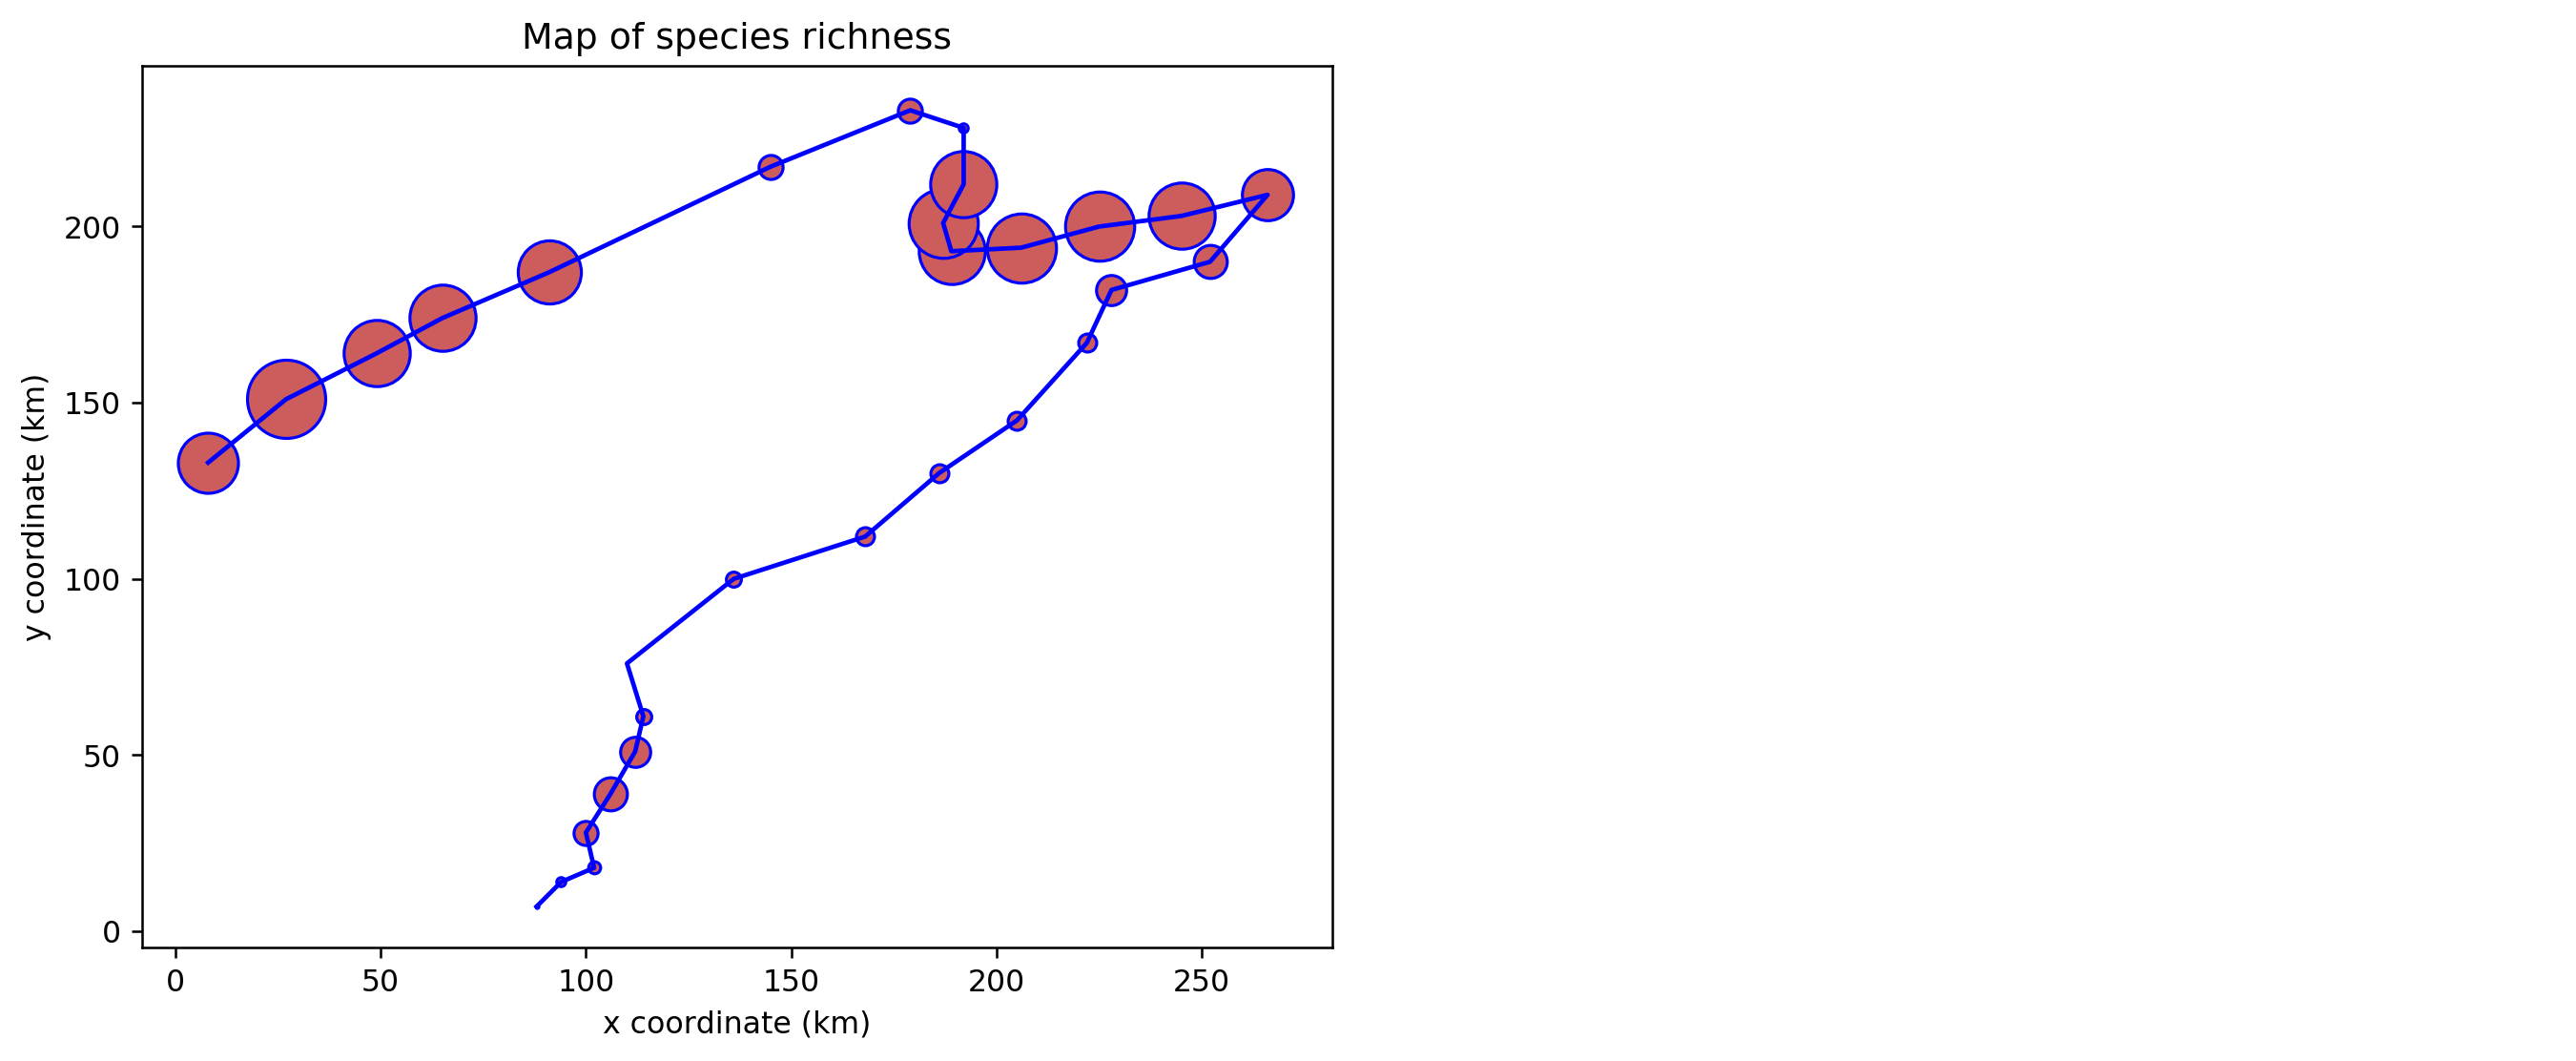

In [8]:
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))
axes[0].plot(df_Spa['x'], df_Spa['y'], c='b')

for i in range(df_Spa.shape[0]):
    axes[0].scatter(df_Spa['x'][i], df_Spa['y'][i], marker='o', s=np.square(species_richness[i]), c='indianred', edgecolor='b')

axes[0].set_xlabel('x coordinate (km)')
axes[0].set_ylabel('y coordinate (km)')
axes[0].set_title('Map of species richness')
axes[1].axis('off')
plt.tight_layout()

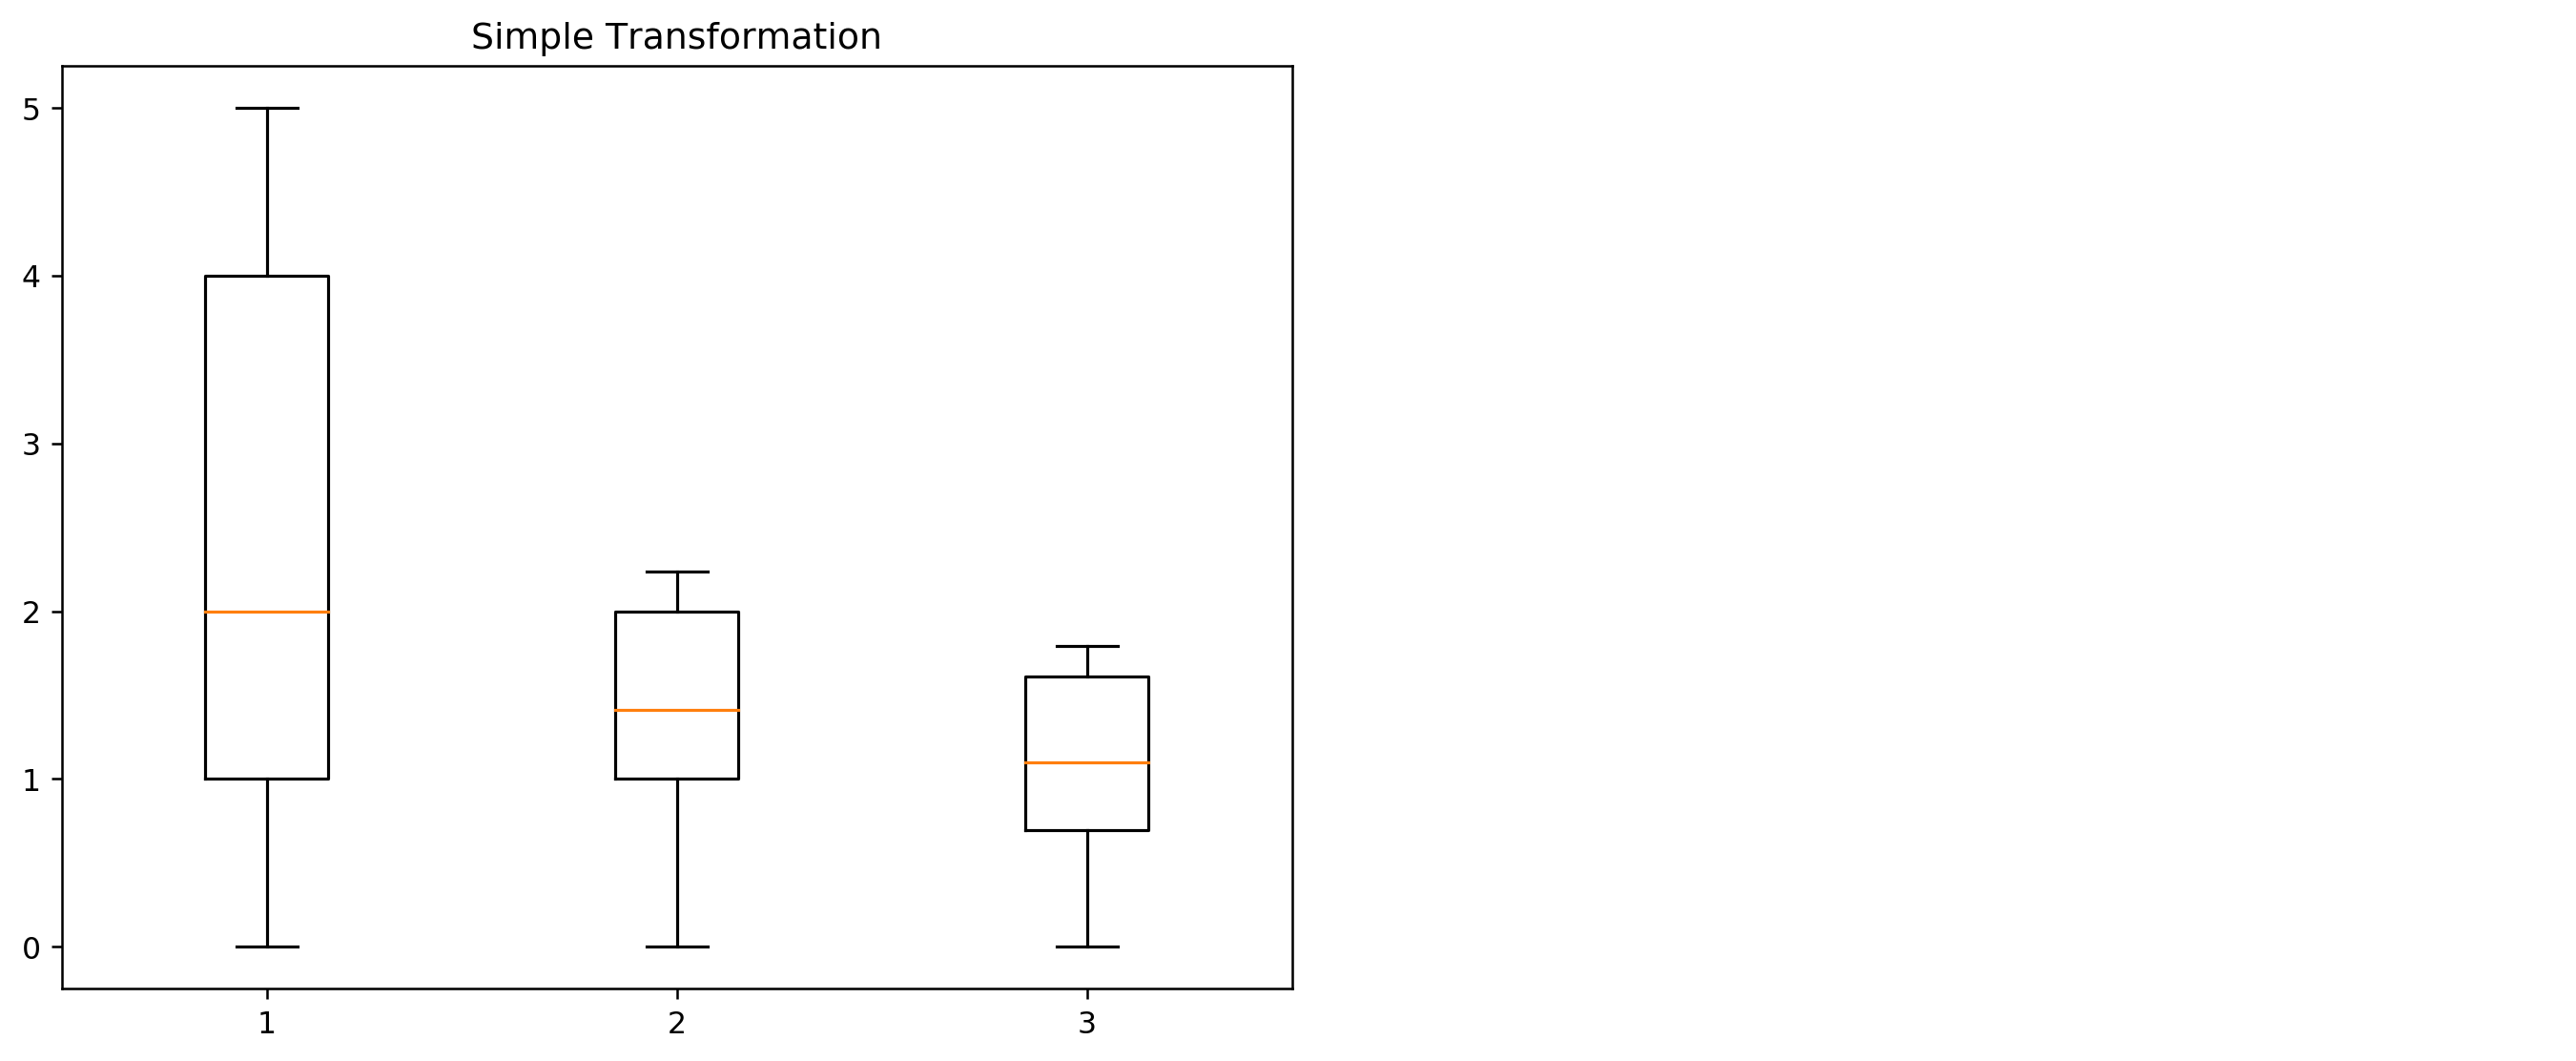

In [9]:
fig, axes = plt.subplots(1, 2, dpi=227, sharey=True, figsize=(12, 5))

axes[0].boxplot([df_Abu['LOC'], np.sqrt(df_Abu['LOC']), np.log(df_Abu['LOC'] + 1)])
axes[0].set_xticks(np.arange(1, 4), ['raw data', 'sqrt', 'log1p'])
axes[0].set_title('Simple Transformation')
axes[1].axis('off')
plt.tight_layout()

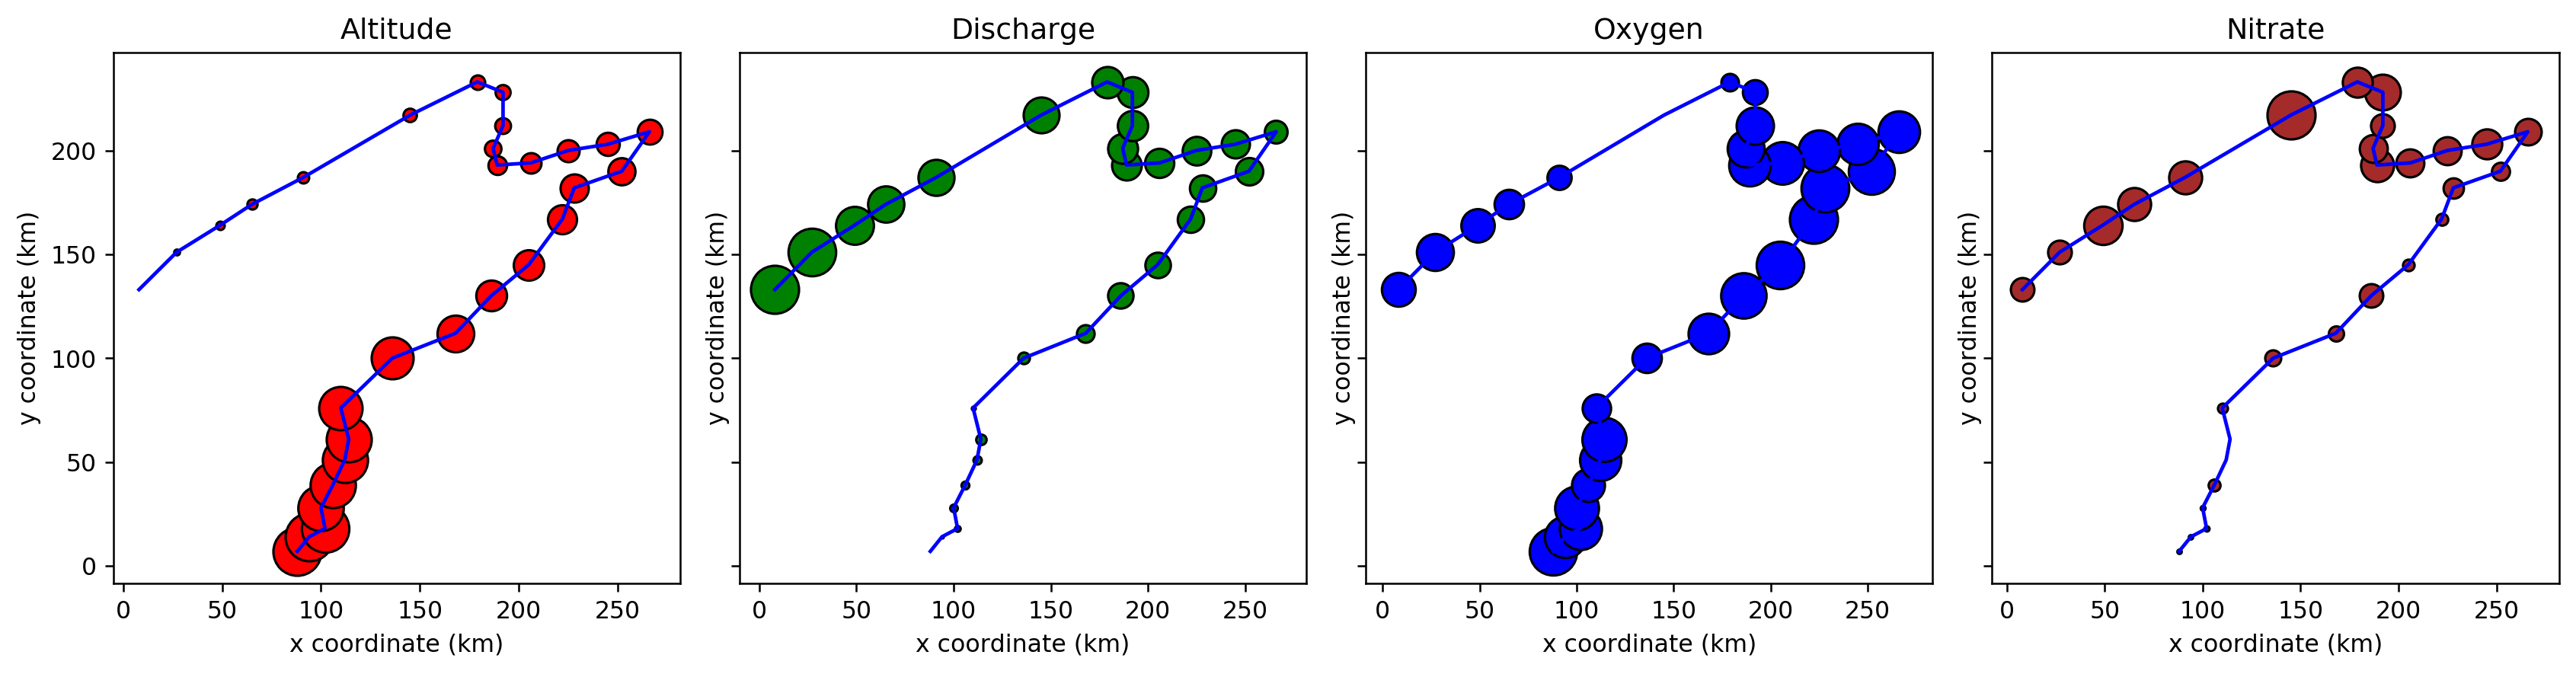

In [10]:
fig, axes = plt.subplots(1, 4, dpi=227, sharey=True, figsize=(15, 4))
axes = axes.ravel()
cols = ['alt', 'deb', 'oxy', 'nit']
colors = ['red', 'green', 'blue', 'brown']
titles = ['Altitude', 'Discharge', 'Oxygen', 'Nitrate']

marker_size = df_Env.copy()
for col in df_Env:
    Vmin = df_Env[col].min()
    Vmax = df_Env[col].max()
    marker_size[col] = (df_Env[col] - Vmin) / (Vmax - Vmin)
    
for (col, title, color, ax) in zip(cols, titles, colors, axes):
    ax.plot(df_Spa['x'], df_Spa['y'], c='b')
    for i in range(df_Spa.shape[0]):
        ax.scatter(df_Spa['x'][i], df_Spa['y'][i], marker='o', s=marker_size[col][i] * 400, c=color, edgecolor='k')
        ax.set_xlabel('x coordinate (km)')
        ax.set_ylabel('y coordinate (km)')
        ax.set_title(title)

plt.tight_layout()
plt.savefig('env.png')

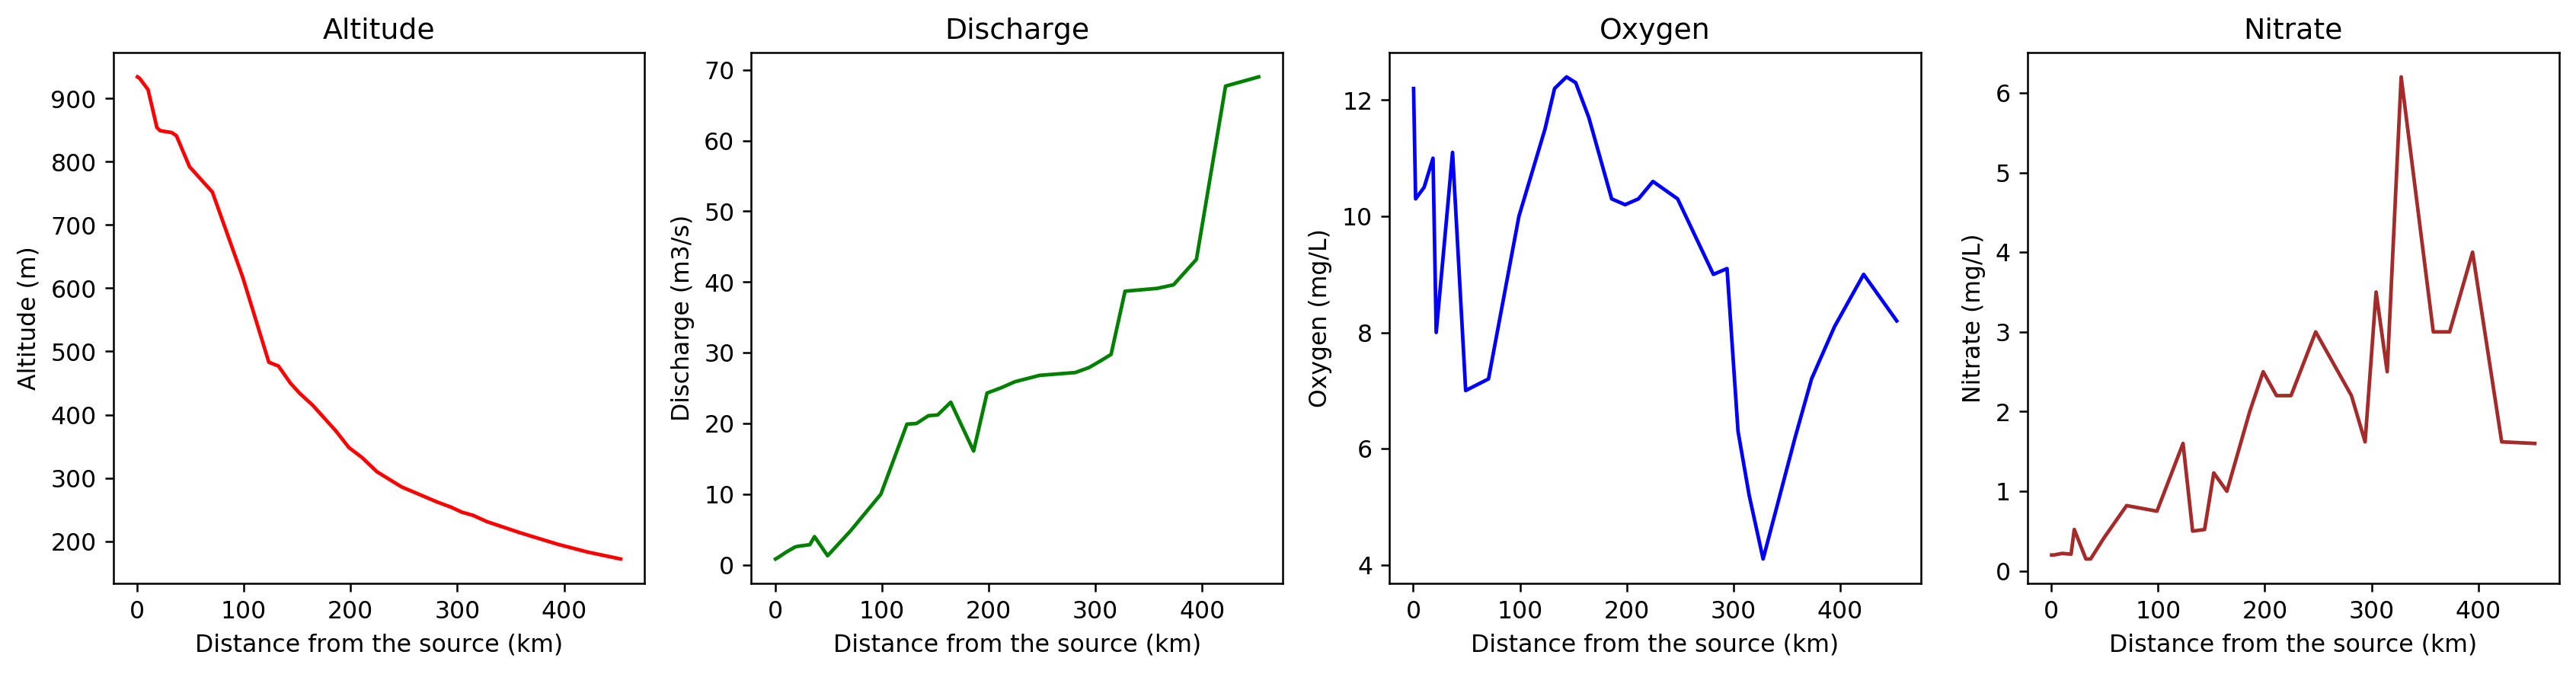

In [11]:
fig, axes = plt.subplots(1, 4, dpi=227, sharey=False, figsize=(15, 4))
axes = axes.ravel()
cols = ['alt', 'deb', 'oxy', 'nit']
colors = ['red', 'green', 'blue', 'brown']
ylabels = ['Altitude (m)', 'Discharge (m3/s)', 'Oxygen (mg/L)', 'Nitrate (mg/L)']
titles = ['Altitude', 'Discharge', 'Oxygen', 'Nitrate']

for (col, title, ylabel, color, ax) in zip(cols, titles, ylabels, colors, axes):
    ax.plot(df_Env['das'], df_Env[col], c=color)
    ax.set_xlabel('Distance from the source (km)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)

plt.tight_layout()